In [39]:
import pandas as pd 
import matplotlib.pyplot as plt
data_path = '../BindingDB_All.tsv'

In [ ]:
df = pd.read_csv(data_path, sep='\t', on_bad_lines='skip');
df.head()
useful_cols = ['BindingDB Reactant_set_id', 'Ligand SMILES', 'Target Name', 'IC50 (nM)', 
'BindingDB Target Chain Sequence', 'UniProt (SwissProt) Entry Name of Target Chain']
df = df[useful_cols]
df.head()

/var/folders/f1/fcqwxxfn4sqbczpwghg752_c0000gn/T/ipykernel_56392/636784140.py:1: DtypeWarning: Columns (8,9,10,11,12,13,15,17,18,20,21,22,23,27,28,32,33,35,36,45,46,47,48,50,51,52,53,54,55,57,58,59,60,62,63,64,65,66,67,69,70,71,72,74,75,76,77,78,79,81,82,83,86,87,88,89,90,91,93,94,95,98,99,100,101,102,103,105,106,107,110,111,112,113,114,115,117,118,119,122,123,124,125,126,127,129,130,131,134,135,136,137,138,139,146,147,148,149,150,151,158,159,160,161,162,163,170,172,173,174,175) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path, sep='\t', on_bad_lines='skip');


In [43]:
# Deal with Bins
def remove_comparator(s):
    if type(s)==str:
        s = s.replace('<', '')
        s = s.replace('>', '')
    return s

clean_df = df.copy()
clean_df['IC50 (nM)'] = clean_df['IC50 (nM)'].apply(remove_comparator)
clean_df['IC50 (nM)'] = pd.to_numeric(clean_df['IC50 (nM)'], errors='coerce')
clean_df = clean_df.dropna(subset=['IC50 (nM)'])
clean_df.head()

,BindingDB Reactant_set_id,Ligand SMILES,Target Name,IC50 (nM),BindingDB Target Chain Sequence,UniProt (SwissProt) Entry Name of Target Chain
142,143,Cc1nc(CN2CCN(CC2)c2c(Cl)cnc3[nH]c(nc23)-c2cn(C...,Cytochrome P450 3A4,50000.0,MALIPDLAMETWLLLAVSLVLLYLYGTHSHGLFKKLGIPGPTPLPF...,CP3A4_HUMAN
144,145,O=C1CCCC2=C1C1(CCS(=O)(=O)C1)N=C(Nc1nc3ccccc3o...,Galactokinase,6676.9,MAALRQPQVAELLAEARRAFREEFGAEPELAVSAPGRVNLIGEHTD...,GALK1_HUMAN
180,181,CC(C)[C@H](NC(C)=O)C(=O)N[C@@H](Cc1ccccc1)[C@@...,Dimer of Gag-Pol polyprotein [489-587],8.5,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,POL_HV1N5
181,182,CCOC(=O)N[C@@H](C(C)C)C(=O)N[C@@H](Cc1ccccc1)[...,Dimer of Gag-Pol polyprotein [489-587],177.0,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,POL_HV1N5
183,184,COCCOC(=O)N[C@@H](C(C)C)C(=O)N[C@@H](Cc1ccccc1...,Dimer of Gag-Pol polyprotein [489-587],164.0,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,POL_HV1N5


In [ ]:
merged_df = clean_df.groupby(['Ligand SMILES', 'Target Name', 'BindingDB Target Chain Sequence', 'UniProt (SwissProt) Entry Name of Target Chain'])['IC50 (nM)'].min().reset_index()
merged_df.to_csv('merged_df_24_11_07.csv')
merged_df.head()

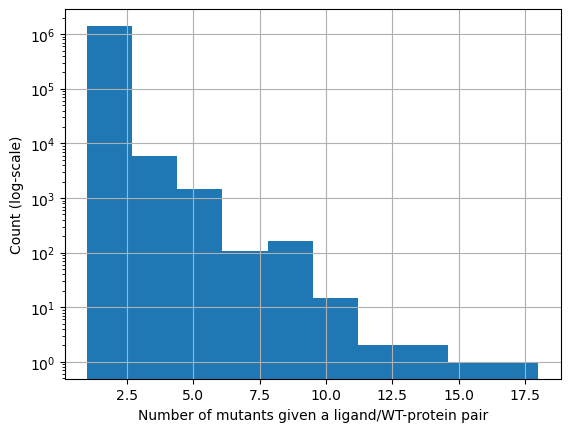

In [46]:
merged_df.groupby(['Ligand SMILES', 'UniProt (SwissProt) Entry Name of Target Chain']).count().reset_index()['Target Name'].hist(log=True)
plt.xlabel('Number of mutants given a ligand/WT-protein pair')
plt.ylabel('Count (log-scale)');

In [ ]:
filtered_df = merged_df.groupby(['Ligand SMILES', 'UniProt (SwissProt) Entry Name of Target Chain']).filter(lambda x: len(x) >= 2)
mutants_filtered_df = filtered_df.groupby(['Ligand SMILES', 'UniProt (SwissProt) Entry Name of Target Chain'])['Target Name'].apply(list).reset_index()
mutants_filtered_df.to_csv('mutants_24_11_07.csv')
mutants_filtered_df.head()

,Ligand SMILES,UniProt (SwissProt) Entry Name of Target Chain,Target Name
0,Brc1c(cccc1C(=O)Nc1ccc2[nH]nc(-c3ccoc3)c2c1)C#N,LRRK2_HUMAN,[Leucine-rich repeat serine/threonine-protein ...
1,Brc1cc(CN2CCC(CC2)N2CC(CC#N)(C2)n2cc(cn2)-c2nc...,JAK2_HUMAN,"[Tyrosine-protein kinase JAK2 [828-1132], Tyro..."
2,Brc1cc(CN2CCC(CC2)N2CC(CC#N)(C2)n2cc(cn2)-c2nc...,JAK2_HUMAN,"[Tyrosine-protein kinase JAK2 [828-1132], Tyro..."
3,Brc1cc(OCC2CCOC2)cc2nc(CSC3CCOCC3)[nH]c(=O)c12,PAR14_HUMAN,"[Protein mono-ADP-ribosyltransferase PARP14, P..."
4,Brc1cc(ccc1C(=O)Nc1ccc2[nH]nc(-c3ccoc3)c2c1)C#N,LRRK2_HUMAN,[Leucine-rich repeat serine/threonine-protein ...
...,...,...,...
33912,c1[nH]nc(c1-c1ccnc2ccccc12)-c1ccccn1,TGFR1_HUMAN,"[TGF-beta receptor type-1, TGF-beta receptor t..."
33913,c1ccncc1.C[C@H]1CC[C@H]2[C@@H]3CC[C@@H]4C[C@@H...,NMDZ1_HUMAN,"[Glutamate receptor ionotropic, NMDA 1/2B, Glu..."
33914,c1cnc2c(c1)ccc1cccnc21,MMP13_HUMAN,"[Collagenase 3, Collagenase 3 (MMP13)]"
33915,c1cnc2c(c1)ccc1cccnc21,MMP2_HUMAN,"[72 kDa type IV collagenase, 72 kDa type IV co..."
